# Analiza računalnikov na [nemškem Amazonu](https://www.amazon.de/s?k=nuc&page=2&language=en&crid=3VIZDYTXC6EN7&qid=1666151008&sprefix=n%2Caps%2C187&ref=sr_pg_2)

Projektna naloga pri predmetu Programiranje 1

## 0. Priprava podatkov

Preden začnemo, moramo uvoziti vnaprej pripravljene podatke. V ta namen uporabimo knjižnico pandas in vnesemo podatke v tabele.

In [10]:
import pandas as pd
import os
import numpy as np

import subprocess
import sys
import matplotlib.pyplot as plt

# izberemo interaktivni stil risanja",
%matplotlib inline

# spremenimo velikost figur
plt.rcParams['figure.figsize'] = (10, 5)

pd.set_option('display.max_rows', 20)

In [40]:
import matplotlib.pyplot as plt

In [11]:
pot_do_nucov = os.path.join('obdelani-podatki', 'nuci.csv')
pot_do_operacijskih_sistemov = os.path.join('obdelani-podatki', 'operacijski_sistem.csv')
pot_do_proizvajalcev = os.path.join('obdelani-podatki', 'proizvajalci.csv')
pot_do_ram = os.path.join('obdelani-podatki', 'ram.csv')
pot_do_ssd = os.path.join('obdelani-podatki', 'ssd.csv')

nuci = pd.read_csv(pot_do_nucov)
operacijski_sistemi = pd.read_csv(pot_do_operacijskih_sistemov)
proizvajalci = pd.read_csv(pot_do_proizvajalcev)
ram = pd.read_csv(pot_do_ram)
ssd = pd.read_csv(pot_do_ssd)

Tukaj še malo očistim podatke, saj nam gredo NUC-i brez cene samo v napoto 

In [12]:
nuci['stevilo_ocen'] = nuci['stevilo_ocen'].apply(lambda s: s.replace(",", ""))
nuci = nuci[
    (nuci['cena'] != -1) & (nuci['ocena'] != -1)
].astype(
    {'stevilo_ocen': 'int64'}
).sort_values(
    'cena', ascending=False
)

Sedaj si oglejmo, katere podatke smo zajeli. Začnimo z glavno tabelo, tabelo NUCov. Kot vidimo, so zajeta naslednja polja:
- opis
- cena
- id
- vrednost_kupona
- ocena
- stevilo_ocen
- cas_dostave
- amazons_choice
- produkt_sponzoriran
- proizvajalec_id
- OS_id
- ssd_id
- ram_id

In [13]:
nuci.head()

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id
123,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12
249,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12
326,Intel NUC 9 Pro Kit with 9th Generation Intel ...,2013.71,B086LFB22V,0.0,5.0,7,-1,False,False,1,5,18,12
231,Intel NUC BKNUC9VXQNX2 PC / Workstation Barebo...,1829.69,B084K1SV45,0.0,4.2,5,15,False,False,1,4,18,12
31,"Intel NUC 11, Intel Core i7-1165G7, 2.8-4.7GHz...",1699.99,B09KR9QQCR,0.0,4.5,12,21,False,False,1,5,18,12


V tabeli operacijski_sistemi je shranjena povezava med operacijskimi sistemi in njihovimi ID-ji. S tem poskrbim, da so podatki o operacijskih sistemih normalizirani.

In [14]:
operacijski_sistemi

,operacijski_sistem_id,operacijski_sistem
0,1,Windows
1,2,OS X
2,3,Linux
3,4,no OS
4,5,unknown


Na podoben način poskrbim na normalizacijo podatkov med proizvajalci, RAM-om in SSD-jem:

In [15]:
proizvajalci

,proizvajalec_id,proizvajalec
0,1,Intel
1,2,GEEKOM
2,3,MINIS FORUM
3,4,Shinobee
4,5,Chuwi
...,...,...
17,18,ZOTAC
18,19,Beelink
19,20,Fujitsu
20,21,MeLE


In [16]:
ram

,ram_id,ram
0,1,4
1,2,6
2,3,8
3,4,12
4,5,16
5,6,32
6,7,46
7,8,48
8,9,58
9,10,64


In [17]:
ssd

,ssd_id,ssd
0,1,0
1,2,1
2,3,2
3,4,16
4,5,32
5,6,64
6,7,120
7,8,128
8,9,240
9,10,250


## 1. Vpliv posamičnih elementov na ceno

Glavni dejavnik, ki bo vplival na odločitev nakupa za računalnik, bo vedno cena. Zanima me, kakšna je porazdelitev računalnikov glede na ceno.

In [18]:
nuci['cena_discrete'] = (nuci['cena'] // 100) * 100 + 50
nuci = nuci.astype(
    {'cena_discrete': 'int64'}
)

Text(0.5, 1.0, 'T')

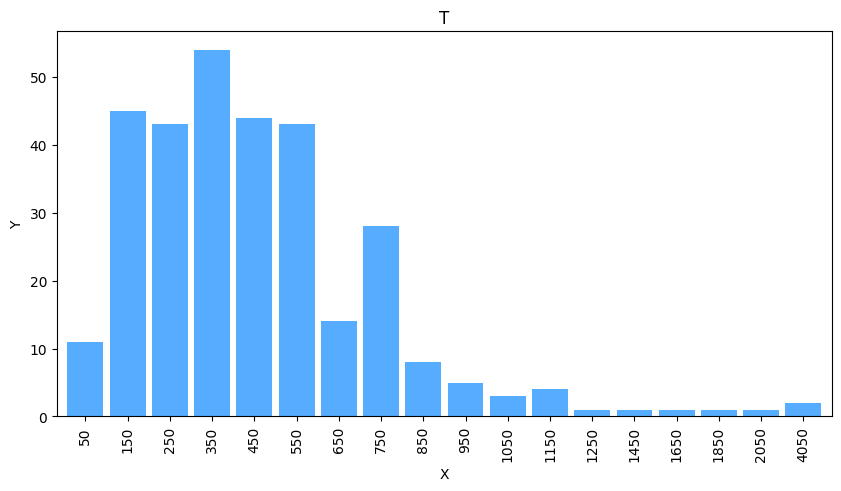

In [19]:
q = nuci['cena_discrete'].value_counts().sort_index()
ax = q.plot.bar(color='dodgerblue', alpha=0.75, linewidth=1, width=0.85)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('T')

In [20]:
q.values

array([11, 45, 43, 54, 44, 43, 14, 28,  8,  5,  3,  4,  1,  1,  1,  1,  1,
        2])

Največ računalnikov ima ceno med 300 in 400€. Najverjetneje je to zato, ker je trg za računalnike v takem cenovnem razredu največji. Podrobneje si poglejmo le-te:

In [21]:
nuci[nuci['cena_discrete'] == 350].head(3)

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
355,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,False,5,1,11,3,350
215,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,True,5,1,11,3,350
369,"CHUWI Mini PC LarkBox X, AMD Ryzen™7 3750H Pro...",399.0,B00OKAHH8O,30.0,4.3,254,8,False,True,5,1,11,3,350


Zanima me, kako se razlikujejo povprečne ocene med temi računalniki - je eden res lahko toliko boljši od drugega? Tukaj zavržem tiste računalnike, kjer je število ocen manjše od 10, saj nam tam že en slab review porodi bistveno slabšo povprečno oceno

<AxesSubplot: >

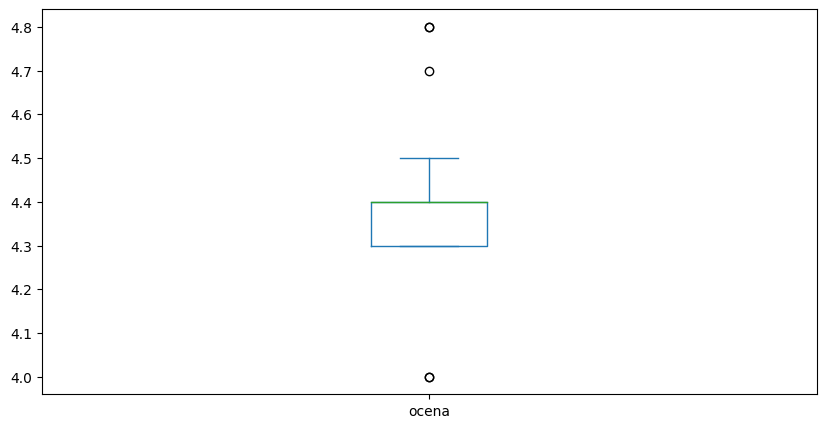

In [22]:
nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10)
    ].plot.box(
    column=['ocena']
)

Povprečna ocena računalnikov v takem cenovnem razredu je $4.4$ z vrednostima $4.0$ in $4.8$ kot naši anomaliji. Pokazano drugače, tako izgledajo naši rezultati:

<AxesSubplot: >

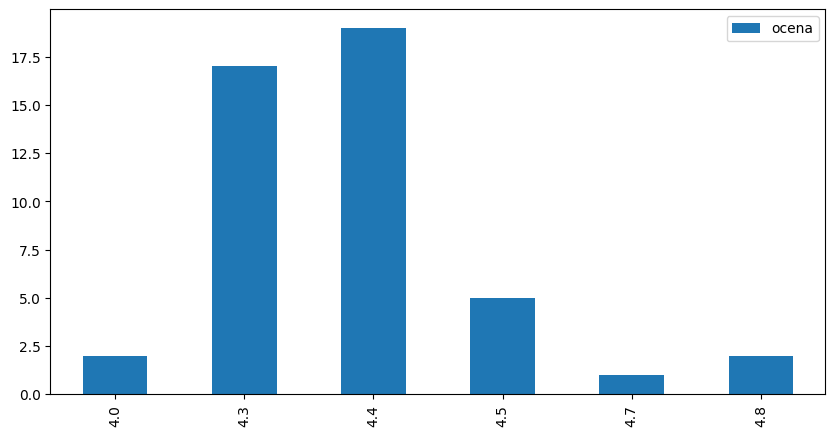

In [23]:
pd.DataFrame(
    nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10)
][
    'ocena'
].value_counts(
).sort_values(
    ascending=False
).sort_index()
).plot.bar()

Poglejmo si ta dva ekstrema ocen:

In [24]:
nuci[
    (nuci['cena_discrete'] == 350) & (nuci['stevilo_ocen'] >= 10) & ((nuci['ocena'] == 4) | (nuci['ocena'] == 4.8))
].sort_values('ocena')

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
252,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,343.0,B09BCPC6G2,0.0,4.0,45,27,False,False,1,1,18,3,350
349,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,343.0,B09BCPC6G2,0.0,4.0,45,27,False,False,1,1,18,3,350
311,STRHIGP Firewall Mini PC OPNsense Celeron J412...,353.0,B09QM69CJ8,0.0,4.8,13,8,False,False,16,5,8,8,350
301,HSIPC Jasper Lake Celeron N5105 Quad Core Fire...,325.0,B0B1LPR3NQ,0.0,4.8,29,8,False,False,22,5,18,3,350


Hmm, izgleda, da sta NUCa s povprečno oceno $4.0$ v bistvu ista računalnika, ki sta se na Amazonu pojavila dvakrat.

In [25]:
def zdruzi_vse_podatke_v_eno_tabelo(df):
    """Levo zdruzi (pofiltrirano) tabelo nuci z tabelami operacijski_sistem, proizvajalci, ram, ssd ter vrne zdruzeno tabelo"""
    return df.merge(
        ssd, on='ssd_id', how='left'
        ).merge(
            ram, on='ram_id', how='left'
        ).merge(
            proizvajalci, on='proizvajalec_id', how='left'
        ).merge(
        operacijski_sistemi, left_on='OS_id', right_on='operacijski_sistem_id', how='left'
    )

In [26]:
anomalije_zdruzene = zdruzi_vse_podatke_v_eno_tabelo(
    nuci[
        (nuci['cena_discrete'] == 350) & 
        (nuci['stevilo_ocen'] >= 10) & 
        ((nuci['ocena'] == 4) | (nuci['ocena'] == 4.8))
    ].sort_values('ocena')
).drop_duplicates()

Vzamem en NUC z oceno $4.0$ in enega z $4.8$ ter primerjam njune glavne specifikacije

In [27]:
anomalije_zdruzene = anomalije_zdruzene[
    (anomalije_zdruzene['id'] == 'B09BCPC6G2') |
    (anomalije_zdruzene['id'] == 'B0B1LPR3NQ')
][
    ['id', 'opis', 'vrednost_kupona', 'ocena', 
     'stevilo_ocen', 'cas_dostave', 'ssd', 'ram', 
     'proizvajalec', 'operacijski_sistem']
]

In [28]:
anomalije_zdruzene

,id,opis,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,ssd,ram,proizvajalec,operacijski_sistem
0,B09BCPC6G2,Lenovo ThinkCentre M900 Tiny Mini PC | Intel C...,0.0,4.0,45,27,unknown,8,Intel,Windows
3,B0B1LPR3NQ,HSIPC Jasper Lake Celeron N5105 Quad Core Fire...,0.0,4.8,29,8,unknown,8,unknown,unknown


O računalniku z višjo oceno izvemo bolj malo stvari. Vseeno je glavna razlika videti v času dostave računalnikov.

Poglejmo si več o času dostave računalnikov:

<AxesSubplot: >

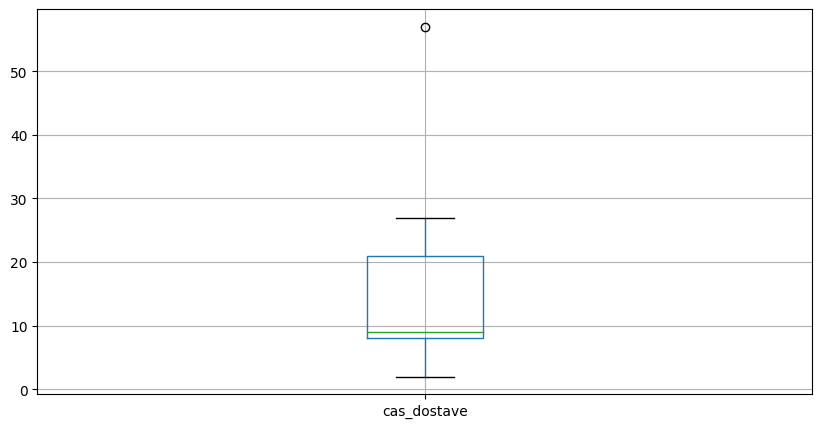

In [29]:
nuci[nuci['cas_dostave'] != -1].boxplot(column=['cas_dostave'])

Večino računalnikov se dostavi v desetih dneh, opazimo pa, da so redki primeri, ki naše podatke o povprečni dostavi potegnejo strmo navzgor.

Prej smo videli, da je bila glavna razlika med računalnikoma z visoko in nizko oceno čas dostave računalnikov. Zanima me, kako sta povezana čas dostave in povprečna ocena računalnikov v splošnem.

<AxesSubplot: xlabel='ocena', ylabel='cas_dostave'>

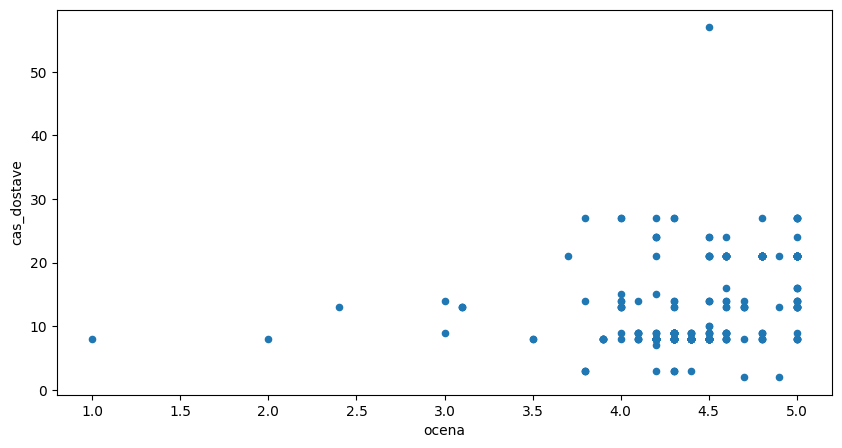

In [30]:
nuci[
    (nuci['cas_dostave'] != -1)
].plot.scatter(x='ocena', y='cas_dostave')

Hm, se zdi da ni resne povezave med tema dvema količinama... tudi to se zgodi :)

In [31]:
zdruzeni_nuci = zdruzi_vse_podatke_v_eno_tabelo(
    nuci
).drop(
    ['operacijski_sistem_id', 'OS_id', 'ssd_id', 'ram_id', 'proizvajalec_id'], axis=1
)

In [32]:
zdruzeni_nuci.tail()

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,cena_discrete,ssd,ram,proizvajalec,operacijski_sistem
304,Gigabyte GB-BACE-3000 (rev. 1.0) BGA 1170 1.04...,69.99,B01BLVFQF0,0.0,3.1,15,13,False,False,50,unknown,unknown,Intel,no OS
305,Landalanya Replacement CPU Fan for Intel NUC N...,39.66,B09C4F6J76,0.0,4.8,6,-1,False,False,50,unknown,unknown,Intel,unknown
306,"SilverStone SST-PT14-H1T1; Petit Intel NUC, Bo...",29.83,B00GSAOEQW,0.0,4.7,63,14,False,False,50,unknown,unknown,Intel,unknown
307,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,50,unknown,unknown,Intel,unknown
308,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,50,unknown,unknown,Intel,unknown


<AxesSubplot: >

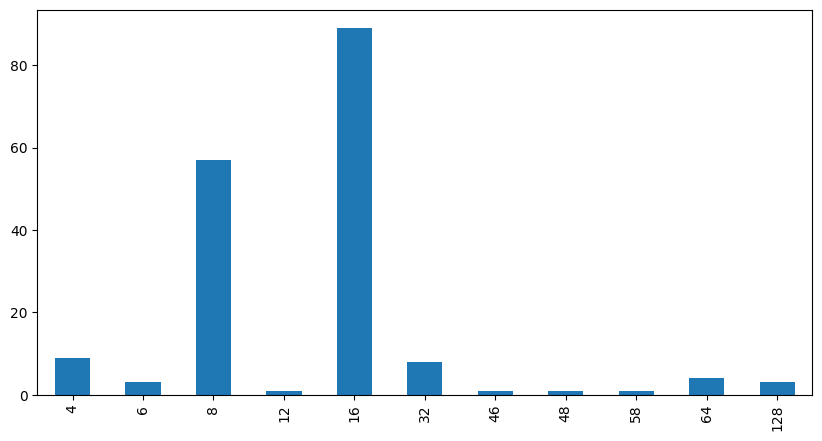

In [33]:
zdruzeni_nuci[zdruzeni_nuci['ram'] != 'unknown'].astype(
    {'ram': 'int64'}
)['ram'].value_counts().sort_index().plot.bar()

<AxesSubplot: >

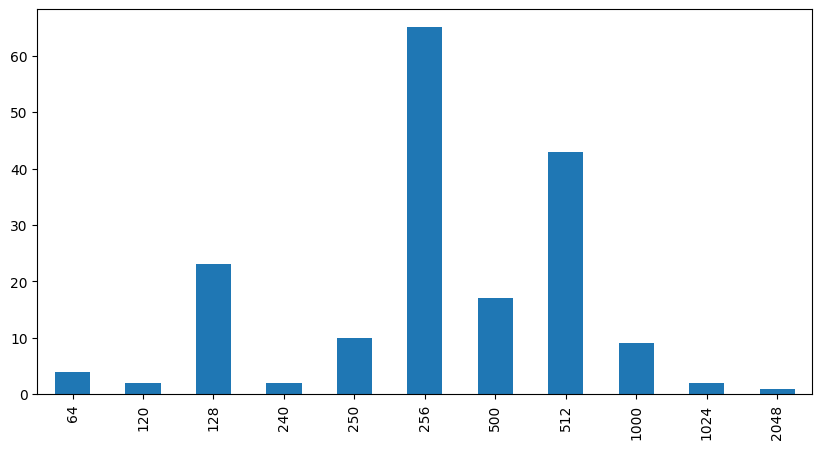

In [34]:
zdruzeni_nuci[zdruzeni_nuci['ssd'] != 'unknown'].astype(
    {'ssd': 'int64'}
)['ssd'].value_counts().sort_index().plot.bar()

Upoštevati je treba, kapacitete RAM-a in SSD-ja običajno nastopajo v potencah števila 2. Če v zgornjih dveh grafih zavržemo števila, ki niso potence števila 2, dobimo lepe, približno normalno porazdeljene podatke o teh dveh kapacitetah računalnikov. Največ je računalnikov, ki imajo 16 GB RAMa in 256 GB SSD-ja. Številke so smiselne, saj je dandanes to standardna kapaciteta računalnikov.

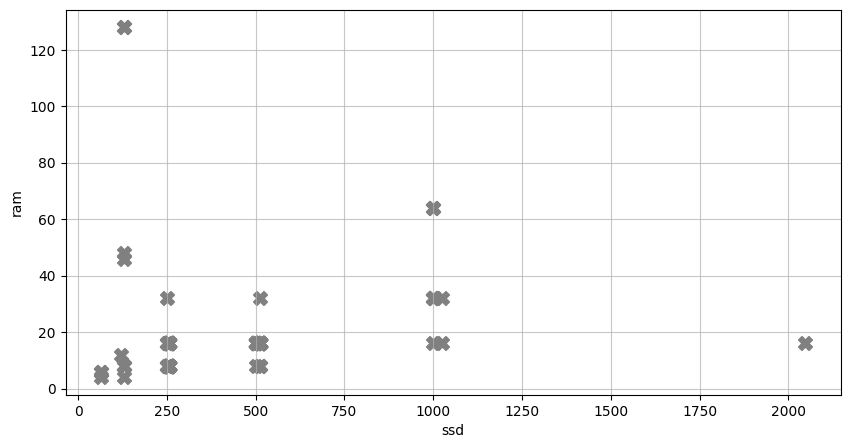

In [35]:
ax = zdruzeni_nuci[
    (zdruzeni_nuci['ssd'] != 'unknown') &
    (zdruzeni_nuci['ram'] != 'unknown')
].astype(
    {'ssd': 'int64', 'ram': 'int64'}
).plot.scatter(x='ssd', y='ram', s=100, color='grey', marker='X')
ax.grid(alpha=0.7)

Žal je podatkov premalo, da bi lahko naredili lep sklep, videti pa je, da večja kapaciteta delovnega pomnilnika (RAMa) implicira tudi večji pospešeni računalniški spomin in obratno.

In [36]:
nuci

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,proizvajalec_id,OS_id,ssd_id,ram_id,cena_discrete
123,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12,4050
249,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,1,1,18,12,4050
326,Intel NUC 9 Pro Kit with 9th Generation Intel ...,2013.71,B086LFB22V,0.0,5.0,7,-1,False,False,1,5,18,12,2050
231,Intel NUC BKNUC9VXQNX2 PC / Workstation Barebo...,1829.69,B084K1SV45,0.0,4.2,5,15,False,False,1,4,18,12,1850
31,"Intel NUC 11, Intel Core i7-1165G7, 2.8-4.7GHz...",1699.99,B09KR9QQCR,0.0,4.5,12,21,False,False,1,5,18,12,1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Gigabyte GB-BACE-3000 (rev. 1.0) BGA 1170 1.04...,69.99,B01BLVFQF0,0.0,3.1,15,13,False,False,1,4,18,12,50
393,Landalanya Replacement CPU Fan for Intel NUC N...,39.66,B09C4F6J76,0.0,4.8,6,-1,False,False,1,5,18,12,50
377,"SilverStone SST-PT14-H1T1; Petit Intel NUC, Bo...",29.83,B00GSAOEQW,0.0,4.7,63,14,False,False,1,5,18,12,50
24,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,1,5,18,12,50


In [37]:
zdruzeni_nuci

,opis,cena,id,vrednost_kupona,ocena,stevilo_ocen,cas_dostave,amazons_choice,produkt_sponzoriran,cena_discrete,ssd,ram,proizvajalec,operacijski_sistem
0,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,4050,unknown,unknown,Intel,Windows
1,Corsair ONE i300 Compact Gaming PC (Intel Core...,4099.99,B09QMG89VL,0.0,4.2,3,9,False,False,4050,unknown,unknown,Intel,Windows
2,Intel NUC 9 Pro Kit with 9th Generation Intel ...,2013.71,B086LFB22V,0.0,5.0,7,-1,False,False,2050,unknown,unknown,Intel,unknown
3,Intel NUC BKNUC9VXQNX2 PC / Workstation Barebo...,1829.69,B084K1SV45,0.0,4.2,5,15,False,False,1850,unknown,unknown,Intel,no OS
4,"Intel NUC 11, Intel Core i7-1165G7, 2.8-4.7GHz...",1699.99,B09KR9QQCR,0.0,4.5,12,21,False,False,1650,unknown,unknown,Intel,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Gigabyte GB-BACE-3000 (rev. 1.0) BGA 1170 1.04...,69.99,B01BLVFQF0,0.0,3.1,15,13,False,False,50,unknown,unknown,Intel,no OS
305,Landalanya Replacement CPU Fan for Intel NUC N...,39.66,B09C4F6J76,0.0,4.8,6,-1,False,False,50,unknown,unknown,Intel,unknown
306,"SilverStone SST-PT14-H1T1; Petit Intel NUC, Bo...",29.83,B00GSAOEQW,0.0,4.7,63,14,False,False,50,unknown,unknown,Intel,unknown
307,HumanCentric Intel NUC VESA Mount for NUC Mini...,12.99,B07KB4YWQS,0.0,4.6,584,8,False,False,50,unknown,unknown,Intel,unknown


In [59]:
x = ['cena', 'stevilo_ocen', 'ocena', 'cas_dostave', 'amazons_choice', 'produkt_sponzoriran',
    'ssd', 'ram']

x1 = ['stevilo_ocen', 'ocena', 'cas_dostave', 'cena_discrete']# , 'cas_dostave', 'amazons_choice', 'produkt_sponzoriran']

t = zdruzeni_nuci[x1][
    (zdruzeni_nuci['ssd'] != 'unknown')
    & (zdruzeni_nuci['ram'] != 'unknown')
]

size = 4

# Limits for the extent
x_start = 3.0
x_end = 9.0
y_start = 6.0
y_end = 12.0

extent = [x_start, x_end, y_start, y_end]

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = t[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, label, color='black', ha='center', va='center')



corr_matrix = np.corrcoef(t.values, rowvar=False)
# plt.close()
plt.imshow(corr_matrix, interpolation='None', cmap='viridis')

NameError: name 'data' is not defined

In [31]:
corr_matrix

array([[ 1.        , -0.10082775],
       [-0.10082775,  1.        ]])

In [42]:
plt.imshow

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>